# Rainfall Analysis - Jade Bai

### Basic ideas

**1 hour running total rainfall data recorded at irregular intervals.**

**2 questions** :

**• Calculate the de accumulated data**

The first question is to split the 1-hour running data of each day. Overall, this is a time series dataset but at irregular intervals. The most commonly used time seris model ARMA is normally used to predict the future values based on the model built by historical data, which is not the case here. Also, since we don't have much more infomation which can be used to do some predictions or set up when spliting the total value, the idea of Random Number is finally used here to split the 1-hour total rainfall into 60 parts (60 mins) randomly.

**• Find the peak 30 minute period within the supplied time range**

To find the peak 30-min period during the 60 minutes for each day, two functions are designed here which are "CumulativeSum" and "find_the_max". "CumulativeSum" is used to calculate the cumulative rainfall during the following 30 mins starting from different time points in sequence (such as 1-30, 2-31, 3-32..., 31-60). After getting the 31 accumulated sum values, "find_the_max" is used to find the maximum among them and identify the position (starting time point) in the meantime.

In [93]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
#Import these packages into Python
import requests                 # How Python gets the webpages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
from time import sleep
from pylab import rcParams
from datetime import datetime
import datetime as dt
import random
#this line enables the plots to be embedded into the notebook
%matplotlib inline

In [2]:
# Set some Pandas options 
pd.set_option('html', True)
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 30)

In [3]:
#Define default settings for plots
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

In [4]:
data=pd.read_csv("C:/Users/Jade/Desktop/Rainfall.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 2 columns):
unixdatetime    91 non-null int64
value           91 non-null float64
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


In [6]:
data['unixdatetime'] = pd.to_datetime(data['unixdatetime'],unit='s')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 2 columns):
unixdatetime    91 non-null datetime64[ns]
value           91 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


In [8]:
data

,unixdatetime,value
0,2016-01-08,0.23
1,2016-01-09,0.05
2,2016-01-10,0.74
3,2016-01-14,0.12
4,2016-01-15,0.10
5,2016-01-16,0.07
6,2016-01-25,0.07
7,2016-01-30,0.02
8,2016-02-01,0.06
9,2016-02-03,0.49


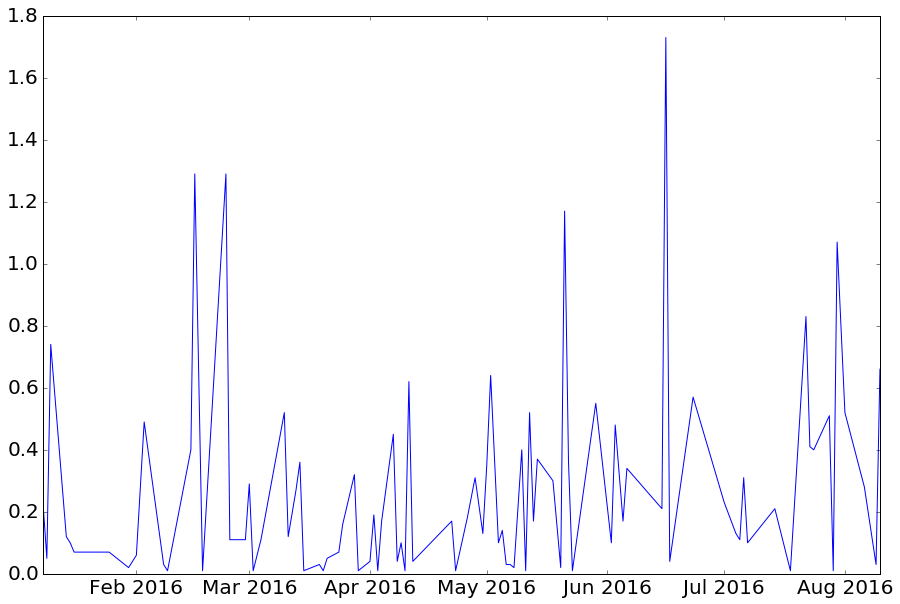

In [9]:
plt.plot(data['unixdatetime'], data['value'])

## Question 1 - Calculate the de-accumulated data

In [10]:
#split the total value into 60 data points for 60 mins
def sum_to_x(x):
    values = [0.0, x] + list(np.random.uniform(low=0.0,high=x,size=60-1))
    values.sort()
    return [values[i+1] - values[i] for i in range(60)]


data[['value_split']]=data[['value']].applymap(sum_to_x)
data.head()

,unixdatetime,value,value_split
0,2016-01-08,0.23,"[0.0078188143846, 0.000212089688414, 0.0076646..."
1,2016-01-09,0.05,"[0.000647613003571, 0.000132634446945, 0.00058..."
2,2016-01-10,0.74,"[0.0217473363556, 0.00889976538787, 0.01445162..."
3,2016-01-14,0.12,"[0.00112151572177, 0.00368860788848, 0.0008519..."
4,2016-01-15,0.10,"[0.000356853148769, 0.00218675937489, 0.001783..."


In [11]:
value_split=pd.DataFrame(data.value_split.values.tolist()).add_prefix('Value_')
value_split.head()

,Value_0,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12,Value_13,Value_14,...,Value_45,Value_46,Value_47,Value_48,Value_49,Value_50,Value_51,Value_52,Value_53,Value_54,Value_55,Value_56,Value_57,Value_58,Value_59
0,0.007819,0.000212,0.007665,0.002035,0.000080,0.000165,0.000350,0.002109,0.007693,0.001823,0.001593,0.006262,0.003611,0.008514,0.000879,...,0.003429,0.001408,0.005357,0.005794,0.000620,0.001658,0.000572,0.009658,0.001564,0.005538,0.010612,0.002359,0.003129,0.012187,0.001395
1,0.000648,0.000133,0.000587,0.001094,0.000800,0.000306,0.000882,0.000361,0.004712,0.001016,0.002020,0.001647,0.000692,0.000714,0.001594,...,0.000331,0.000194,0.000333,0.001906,0.000270,0.000053,0.000011,0.000631,0.000082,0.001909,0.000258,0.001955,0.000234,0.003917,0.001288
2,0.021747,0.008900,0.014452,0.010511,0.000770,0.002330,0.008428,0.003462,0.002078,0.007496,0.033889,0.053457,0.015619,0.000064,0.016763,...,0.001427,0.020555,0.016287,0.009390,0.010904,0.032467,0.007862,0.004902,0.001091,0.002598,0.009557,0.009921,0.038410,0.013161,0.010366
3,0.001122,0.003689,0.000852,0.000732,0.000914,0.004010,0.000292,0.004376,0.002311,0.000764,0.005595,0.000201,0.001462,0.000218,0.009896,...,0.000783,0.003875,0.000997,0.000803,0.001533,0.012429,0.001109,0.000186,0.000461,0.010102,0.000919,0.000452,0.001233,0.005771,0.001825
4,0.000357,0.002187,0.001783,0.000051,0.000916,0.001823,0.000391,0.001421,0.000037,0.001989,0.000832,0.000919,0.000886,0.003982,0.000249,...,0.003218,0.000535,0.000982,0.003162,0.001453,0.000785,0.001907,0.000318,0.001006,0.000275,0.000712,0.001562,0.004841,0.000612,0.001441


In [12]:
FinalData=pd.concat([data[:], value_split[:]], axis=1)
FinalData

,unixdatetime,value,value_split,Value_0,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,...,Value_45,Value_46,Value_47,Value_48,Value_49,Value_50,Value_51,Value_52,Value_53,Value_54,Value_55,Value_56,Value_57,Value_58,Value_59
0,2016-01-08,0.23,"[0.0078188143846, 0.000212089688414, 0.0076646...",0.007819,0.000212,0.007665,0.002035,0.000080,0.000165,0.000350,0.002109,0.007693,0.001823,0.001593,0.006262,...,0.003429,0.001408,0.005357,5.794129e-03,0.000620,0.001658,0.000572,0.009658,0.001564,0.005538,0.010612,2.358547e-03,0.003129,0.012187,0.001395
1,2016-01-09,0.05,"[0.000647613003571, 0.000132634446945, 0.00058...",0.000648,0.000133,0.000587,0.001094,0.000800,0.000306,0.000882,0.000361,0.004712,0.001016,0.002020,0.001647,...,0.000331,0.000194,0.000333,1.906001e-03,0.000270,0.000053,0.000011,0.000631,0.000082,0.001909,0.000258,1.955349e-03,0.000234,0.003917,0.001288
2,2016-01-10,0.74,"[0.0217473363556, 0.00889976538787, 0.01445162...",0.021747,0.008900,0.014452,0.010511,0.000770,0.002330,0.008428,0.003462,0.002078,0.007496,0.033889,0.053457,...,0.001427,0.020555,0.016287,9.389887e-03,0.010904,0.032467,0.007862,0.004902,0.001091,0.002598,0.009557,9.921464e-03,0.038410,0.013161,0.010366
3,2016-01-14,0.12,"[0.00112151572177, 0.00368860788848, 0.0008519...",0.001122,0.003689,0.000852,0.000732,0.000914,0.004010,0.000292,0.004376,0.002311,0.000764,0.005595,0.000201,...,0.000783,0.003875,0.000997,8.033807e-04,0.001533,0.012429,0.001109,0.000186,0.000461,0.010102,0.000919,4.520238e-04,0.001233,0.005771,0.001825
4,2016-01-15,0.10,"[0.000356853148769, 0.00218675937489, 0.001783...",0.000357,0.002187,0.001783,0.000051,0.000916,0.001823,0.000391,0.001421,0.000037,0.001989,0.000832,0.000919,...,0.003218,0.000535,0.000982,3.162097e-03,0.001453,0.000785,0.001907,0.000318,0.001006,0.000275,0.000712,1.561646e-03,0.004841,0.000612,0.001441
5,2016-01-16,0.07,"[0.000887643727175, 0.00225223694584, 0.000189...",0.000888,0.002252,0.000190,0.002692,0.000741,0.000223,0.001220,0.000474,0.001395,0.000264,0.003580,0.003161,...,0.000003,0.000003,0.002203,8.914194e-06,0.000319,0.000569,0.000469,0.003151,0.000306,0.000170,0.000633,1.029179e-04,0.001415,0.001788,0.002297
6,2016-01-25,0.07,"[5.62960661338e-05, 0.00107392082703, 7.756280...",0.000056,0.001074,0.000078,0.001026,0.000276,0.000395,0.000888,0.000170,0.001224,0.000767,0.000490,0.004383,...,0.001907,0.000978,0.002235,9.196604e-04,0.000364,0.000153,0.001805,0.000190,0.000109,0.000479,0.001219,1.235853e-03,0.003209,0.001396,0.004746
7,2016-01-30,0.02,"[0.00120288041954, 0.000536871500171, 0.000195...",0.001203,0.000537,0.000196,0.000270,0.000129,0.000140,0.000088,0.000269,0.000066,0.000127,0.000072,0.000153,...,0.000366,0.000571,0.000309,1.627327e-04,0.000092,0.000474,0.000451,0.000206,0.000083,0.000470,0.000275,3.263441e-05,0.000387,0.000156,0.000236
8,2016-02-01,0.06,"[0.000727841727866, 0.00189971640493, 0.002106...",0.000728,0.001900,0.002106,0.000612,0.000800,0.000583,0.001208,0.002129,0.000018,0.000337,0.000434,0.000337,...,0.001812,0.001944,0.000031,8.268127e-04,0.000310,0.003321,0.000239,0.000667,0.001407,0.000114,0.001460,1.660377e-03,0.001252,0.000301,0.000268
9,2016-02-03,0.49,"[0.0403148980263, 0.00320632222757, 0.00310953...",0.040315,0.003206,0.003110,0.014996,0.001469,0.011123,0.010832,0.001410,0.007152,0.014500,0.005214,0.002302,...,0.002115,0.015027,0.015028,5.770156e-03,0.015964,0.004432,0.018467,0.008061,0.003062,0.003208,0.000717,8.720564e-03,0.000189,0.006880,0.000898


In [13]:
del FinalData['value_split']

In [14]:
FinalData = FinalData.rename(columns = {'unixdatetime':'date'})
FinalData.head()

,date,value,Value_0,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12,...,Value_45,Value_46,Value_47,Value_48,Value_49,Value_50,Value_51,Value_52,Value_53,Value_54,Value_55,Value_56,Value_57,Value_58,Value_59
0,2016-01-08,0.23,0.007819,0.000212,0.007665,0.002035,0.000080,0.000165,0.000350,0.002109,0.007693,0.001823,0.001593,0.006262,0.003611,...,0.003429,0.001408,0.005357,0.005794,0.000620,0.001658,0.000572,0.009658,0.001564,0.005538,0.010612,0.002359,0.003129,0.012187,0.001395
1,2016-01-09,0.05,0.000648,0.000133,0.000587,0.001094,0.000800,0.000306,0.000882,0.000361,0.004712,0.001016,0.002020,0.001647,0.000692,...,0.000331,0.000194,0.000333,0.001906,0.000270,0.000053,0.000011,0.000631,0.000082,0.001909,0.000258,0.001955,0.000234,0.003917,0.001288
2,2016-01-10,0.74,0.021747,0.008900,0.014452,0.010511,0.000770,0.002330,0.008428,0.003462,0.002078,0.007496,0.033889,0.053457,0.015619,...,0.001427,0.020555,0.016287,0.009390,0.010904,0.032467,0.007862,0.004902,0.001091,0.002598,0.009557,0.009921,0.038410,0.013161,0.010366
3,2016-01-14,0.12,0.001122,0.003689,0.000852,0.000732,0.000914,0.004010,0.000292,0.004376,0.002311,0.000764,0.005595,0.000201,0.001462,...,0.000783,0.003875,0.000997,0.000803,0.001533,0.012429,0.001109,0.000186,0.000461,0.010102,0.000919,0.000452,0.001233,0.005771,0.001825
4,2016-01-15,0.10,0.000357,0.002187,0.001783,0.000051,0.000916,0.001823,0.000391,0.001421,0.000037,0.001989,0.000832,0.000919,0.000886,...,0.003218,0.000535,0.000982,0.003162,0.001453,0.000785,0.001907,0.000318,0.001006,0.000275,0.000712,0.001562,0.004841,0.000612,0.001441


In [15]:
FinalData = FinalData.set_index(['date'])
FinalData.head()

,value,Value_0,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12,Value_13,...,Value_45,Value_46,Value_47,Value_48,Value_49,Value_50,Value_51,Value_52,Value_53,Value_54,Value_55,Value_56,Value_57,Value_58,Value_59
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-08,0.23,0.007819,0.000212,0.007665,0.002035,0.000080,0.000165,0.000350,0.002109,0.007693,0.001823,0.001593,0.006262,0.003611,0.008514,...,0.003429,0.001408,0.005357,0.005794,0.000620,0.001658,0.000572,0.009658,0.001564,0.005538,0.010612,0.002359,0.003129,0.012187,0.001395
2016-01-09,0.05,0.000648,0.000133,0.000587,0.001094,0.000800,0.000306,0.000882,0.000361,0.004712,0.001016,0.002020,0.001647,0.000692,0.000714,...,0.000331,0.000194,0.000333,0.001906,0.000270,0.000053,0.000011,0.000631,0.000082,0.001909,0.000258,0.001955,0.000234,0.003917,0.001288
2016-01-10,0.74,0.021747,0.008900,0.014452,0.010511,0.000770,0.002330,0.008428,0.003462,0.002078,0.007496,0.033889,0.053457,0.015619,0.000064,...,0.001427,0.020555,0.016287,0.009390,0.010904,0.032467,0.007862,0.004902,0.001091,0.002598,0.009557,0.009921,0.038410,0.013161,0.010366
2016-01-14,0.12,0.001122,0.003689,0.000852,0.000732,0.000914,0.004010,0.000292,0.004376,0.002311,0.000764,0.005595,0.000201,0.001462,0.000218,...,0.000783,0.003875,0.000997,0.000803,0.001533,0.012429,0.001109,0.000186,0.000461,0.010102,0.000919,0.000452,0.001233,0.005771,0.001825
2016-01-15,0.10,0.000357,0.002187,0.001783,0.000051,0.000916,0.001823,0.000391,0.001421,0.000037,0.001989,0.000832,0.000919,0.000886,0.003982,...,0.003218,0.000535,0.000982,0.003162,0.001453,0.000785,0.001907,0.000318,0.001006,0.000275,0.000712,0.001562,0.004841,0.000612,0.001441


In [16]:
FinalData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2016-01-08 to 2016-08-10
Data columns (total 61 columns):
value       91 non-null float64
Value_0     91 non-null float64
Value_1     91 non-null float64
Value_2     91 non-null float64
Value_3     91 non-null float64
Value_4     91 non-null float64
Value_5     91 non-null float64
Value_6     91 non-null float64
Value_7     91 non-null float64
Value_8     91 non-null float64
Value_9     91 non-null float64
Value_10    91 non-null float64
Value_11    91 non-null float64
Value_12    91 non-null float64
Value_13    91 non-null float64
Value_14    91 non-null float64
Value_15    91 non-null float64
Value_16    91 non-null float64
Value_17    91 non-null float64
Value_18    91 non-null float64
Value_19    91 non-null float64
Value_20    91 non-null float64
Value_21    91 non-null float64
Value_22    91 non-null float64
Value_23    91 non-null float64
Value_24    91 non-null float64
Value_25    91 non-null float64
Value_26    9

In [17]:
A = FinalData.ix['2016-01-08']
B = FinalData.ix['2016-01-09']
C = FinalData.ix['2016-01-10']

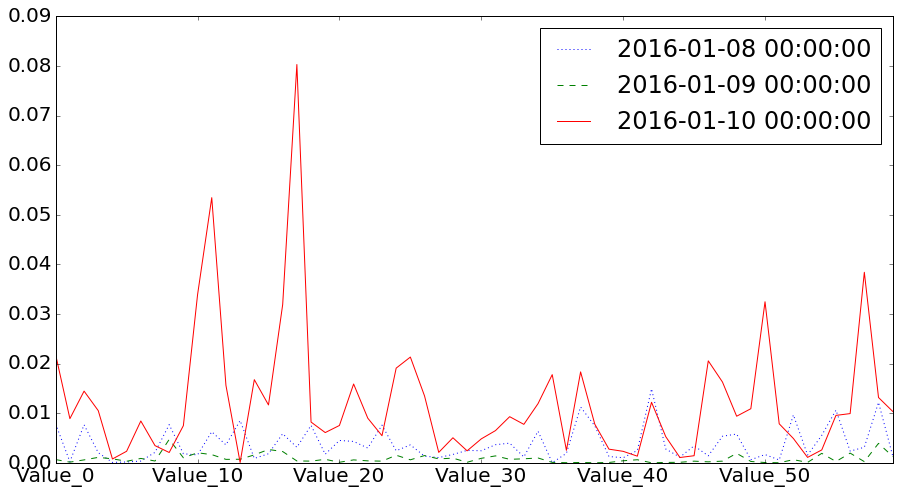

In [18]:
#chose the data of the first three observation days to plot here to see the trend
del A['value']
del B['value']
del C['value']
rcParams['figure.figsize'] = 15, 8
A.plot(style=[':'])
B.plot(style=['--'])
C.plot(style=['-'])
plt.legend()

## Question 2 - Find the peak 30 minute period within the supplied time range

In [19]:
FinalData.head()

,value,Value_0,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12,Value_13,...,Value_45,Value_46,Value_47,Value_48,Value_49,Value_50,Value_51,Value_52,Value_53,Value_54,Value_55,Value_56,Value_57,Value_58,Value_59
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-08,0.23,0.007819,0.000212,0.007665,0.002035,0.000080,0.000165,0.000350,0.002109,0.007693,0.001823,0.001593,0.006262,0.003611,0.008514,...,0.003429,0.001408,0.005357,0.005794,0.000620,0.001658,0.000572,0.009658,0.001564,0.005538,0.010612,0.002359,0.003129,0.012187,0.001395
2016-01-09,0.05,0.000648,0.000133,0.000587,0.001094,0.000800,0.000306,0.000882,0.000361,0.004712,0.001016,0.002020,0.001647,0.000692,0.000714,...,0.000331,0.000194,0.000333,0.001906,0.000270,0.000053,0.000011,0.000631,0.000082,0.001909,0.000258,0.001955,0.000234,0.003917,0.001288
2016-01-10,0.74,0.021747,0.008900,0.014452,0.010511,0.000770,0.002330,0.008428,0.003462,0.002078,0.007496,0.033889,0.053457,0.015619,0.000064,...,0.001427,0.020555,0.016287,0.009390,0.010904,0.032467,0.007862,0.004902,0.001091,0.002598,0.009557,0.009921,0.038410,0.013161,0.010366
2016-01-14,0.12,0.001122,0.003689,0.000852,0.000732,0.000914,0.004010,0.000292,0.004376,0.002311,0.000764,0.005595,0.000201,0.001462,0.000218,...,0.000783,0.003875,0.000997,0.000803,0.001533,0.012429,0.001109,0.000186,0.000461,0.010102,0.000919,0.000452,0.001233,0.005771,0.001825
2016-01-15,0.10,0.000357,0.002187,0.001783,0.000051,0.000916,0.001823,0.000391,0.001421,0.000037,0.001989,0.000832,0.000919,0.000886,0.003982,...,0.003218,0.000535,0.000982,0.003162,0.001453,0.000785,0.001907,0.000318,0.001006,0.000275,0.000712,0.001562,0.004841,0.000612,0.001441


In [20]:
def CumulativeSum(ab):
    z = []
    for i in range(len(ab)/2+1):
        s = 0
        for j in range(len(ab)/2):    
            s = s + ab[i+j]
        z.append(s)
    return z

In [21]:
#Test
a=[2, 5, 8, 10, 4, 5]
CumulativeSum(a)

[15, 23, 22, 19]

In [22]:
del FinalData['value']
FinalData.head()

,Value_0,Value_1,Value_2,Value_3,Value_4,Value_5,Value_6,Value_7,Value_8,Value_9,Value_10,Value_11,Value_12,Value_13,Value_14,...,Value_45,Value_46,Value_47,Value_48,Value_49,Value_50,Value_51,Value_52,Value_53,Value_54,Value_55,Value_56,Value_57,Value_58,Value_59
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-08,0.007819,0.000212,0.007665,0.002035,0.000080,0.000165,0.000350,0.002109,0.007693,0.001823,0.001593,0.006262,0.003611,0.008514,0.000879,...,0.003429,0.001408,0.005357,0.005794,0.000620,0.001658,0.000572,0.009658,0.001564,0.005538,0.010612,0.002359,0.003129,0.012187,0.001395
2016-01-09,0.000648,0.000133,0.000587,0.001094,0.000800,0.000306,0.000882,0.000361,0.004712,0.001016,0.002020,0.001647,0.000692,0.000714,0.001594,...,0.000331,0.000194,0.000333,0.001906,0.000270,0.000053,0.000011,0.000631,0.000082,0.001909,0.000258,0.001955,0.000234,0.003917,0.001288
2016-01-10,0.021747,0.008900,0.014452,0.010511,0.000770,0.002330,0.008428,0.003462,0.002078,0.007496,0.033889,0.053457,0.015619,0.000064,0.016763,...,0.001427,0.020555,0.016287,0.009390,0.010904,0.032467,0.007862,0.004902,0.001091,0.002598,0.009557,0.009921,0.038410,0.013161,0.010366
2016-01-14,0.001122,0.003689,0.000852,0.000732,0.000914,0.004010,0.000292,0.004376,0.002311,0.000764,0.005595,0.000201,0.001462,0.000218,0.009896,...,0.000783,0.003875,0.000997,0.000803,0.001533,0.012429,0.001109,0.000186,0.000461,0.010102,0.000919,0.000452,0.001233,0.005771,0.001825
2016-01-15,0.000357,0.002187,0.001783,0.000051,0.000916,0.001823,0.000391,0.001421,0.000037,0.001989,0.000832,0.000919,0.000886,0.003982,0.000249,...,0.003218,0.000535,0.000982,0.003162,0.001453,0.000785,0.001907,0.000318,0.001006,0.000275,0.000712,0.001562,0.004841,0.000612,0.001441


In [23]:
# calculate the 30-min cumulative rainfall starting from different time points in sequence 
Sum_List=pd.Series(FinalData.apply(CumulativeSum,axis=1))
pd.DataFrame(Sum_List)

,0
date,
2016-01-08,"[0.102908363986, 0.0975172856212, 0.1009515859..."
2016-01-09,"[0.0304092737672, 0.030664661617, 0.0319253432..."
2016-01-10,"[0.439438208444, 0.422518263586, 0.42010959146..."
2016-01-14,"[0.0604861581584, 0.0616753887765, 0.058013830..."
2016-01-15,"[0.0481869776178, 0.0495156188625, 0.051829108..."
2016-01-16,"[0.0425345021016, 0.0421960258217, 0.040352738..."
2016-01-25,"[0.0318501103232, 0.0338093745643, 0.033507784..."
2016-01-30,"[0.00838570392955, 0.00738311457676, 0.0069359..."
2016-02-01,"[0.0292454033732, 0.0286470571809, 0.026849387..."


In [24]:
len(Sum_List.ix['2016-01-08'])

31

In [25]:
def find_the_max(cd):
    x = 0
    Max = cd[x]
    while x < len(cd):
        if cd[x] > Max:
            Max = cd[x]
        x = x+1
    return 'Start Min', cd.index(Max)+1, 'Max 30-min Cumulative Rainfall Value', Max

In [26]:
#test
a=[2, 5, 8, 10, 4, 5]
find_the_max(a)

('Start Min', 4, 'Max 30-min Cumulative Rainfall Value', 10)

In [27]:
# Find the starting time point of 30-min peak and the corresponding max value
# For example, for 2016-01-08, the peak 30-min period is 30~59 with maximum cumulative rainfall of around 0.128.
# for 2016-01-09, the peak 30-min period is 4~33 with maximum cumulative rainfall of around 0.032...
pd.set_option('max_colwidth', -1)
pd.DataFrame(Sum_List.apply(find_the_max))

,0
date,
2016-01-08,"(Start Min, 30, Max 30-min Cumulative Rainfall Value, 0.1281958682)"
2016-01-09,"(Start Min, 4, Max 30-min Cumulative Rainfall Value, 0.0320381937395)"
2016-01-10,"(Start Min, 10, Max 30-min Cumulative Rainfall Value, 0.453472225708)"
2016-01-14,"(Start Min, 2, Max 30-min Cumulative Rainfall Value, 0.0616753887765)"
2016-01-15,"(Start Min, 19, Max 30-min Cumulative Rainfall Value, 0.0627648217166)"
2016-01-16,"(Start Min, 6, Max 30-min Cumulative Rainfall Value, 0.0430924171751)"
2016-01-25,"(Start Min, 31, Max 30-min Cumulative Rainfall Value, 0.0381498896768)"
2016-01-30,"(Start Min, 18, Max 30-min Cumulative Rainfall Value, 0.0121889162953)"
2016-02-01,"(Start Min, 28, Max 30-min Cumulative Rainfall Value, 0.0368322133493)"
